In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [3]:
#taking input from user
client = str(input("Enter Client Name : "))
legal = str(input("Enter Legal Entity (eg. CitiBank Pune) : "))

Enter Client Name : HSBC
Enter Legal Entity (eg. CitiBank Pune) : CitiBank Pune


In [9]:
df = pd.read_csv(r'C:/Users/user/Desktop/TimeSeriesPrediction-master/dataset.csv', parse_dates = ['Date'], index_col = 'Date')
ts = df[(df['Client Name'] == client) & (df['Legal Entity'] == legal)]['Net Amount']

In [10]:
ts.head()

Date
2010-01-01   -81124
2010-02-01   -81081
2010-03-01   -78673
2010-04-01   -87709
2010-05-01   -80581
Name: Net Amount, dtype: int64

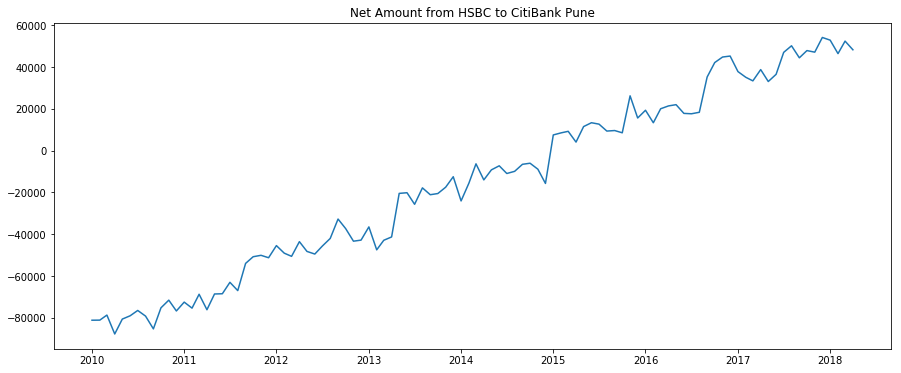

In [13]:
plt.figure(figsize=(15, 6))
plt.title('Net Amount from {} to {}'.format(client,legal))
plt.plot(ts)
plt.show()

In [16]:
#testing stationarity using graphs
def test_stationarity(ts):
        rolmean = ts.rolling(window = 12).mean()
        rolstd = ts.rolling(window = 12).std()
       
        #graphical analysis of rollmean and rollstd
        plt.figure(figsize=(15, 6))
        orig = plt.plot(ts, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show(block=False)


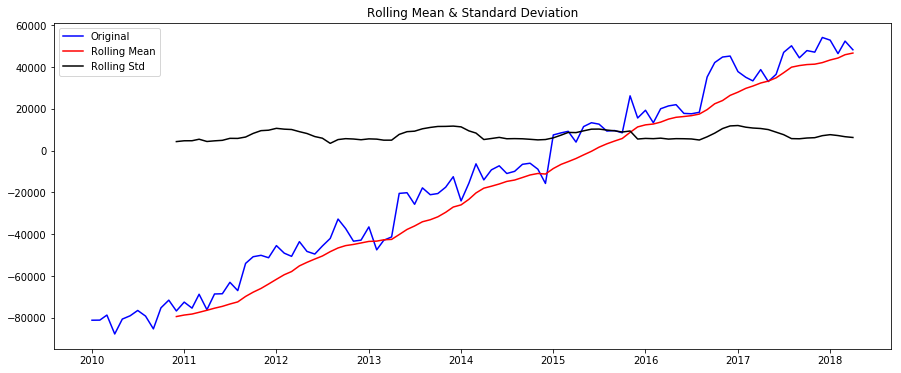

In [17]:
test_stationarity(ts)

In [18]:
#Dickey-Fuller Test
def dickey_f_test(ts):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    pval = dfoutput['p-value']
    print(f'Result: The series is {"not " if pval > 0.05 else ""}stationary')

In [19]:
dickey_f_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                 -0.508136
p-value                         0.890419
#Lags Used                      9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64
Result: The series is not stationary


In [20]:
#KPSS Test
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [21]:
kpss_test(ts)    

KPSS Statistic: 0.8744422836755968
p-value: 0.01
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


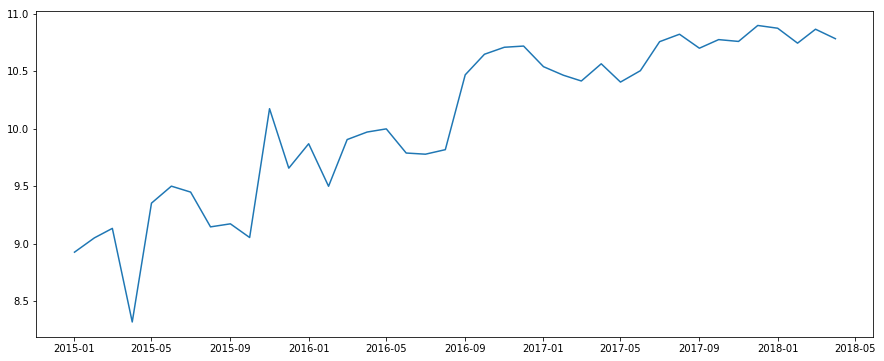

In [23]:
#Applying log transform
ts_log = np.log(ts)
#ts_log.dropna(inplace= True)
plt.figure(figsize=(15, 6))
plt.plot(ts_log)

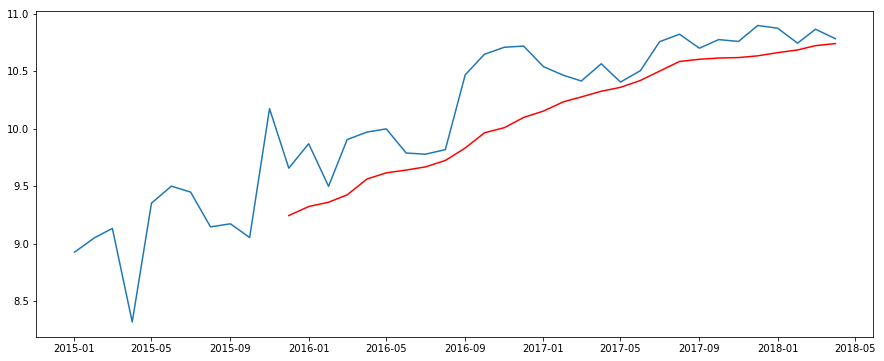

In [24]:
#Moving Avg Method for making series stationary
moving_avg = ts_log.rolling(12).mean()
plt.figure(figsize=(15, 6))
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [25]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)
ts_log_moving_avg_diff.dropna(inplace=True)

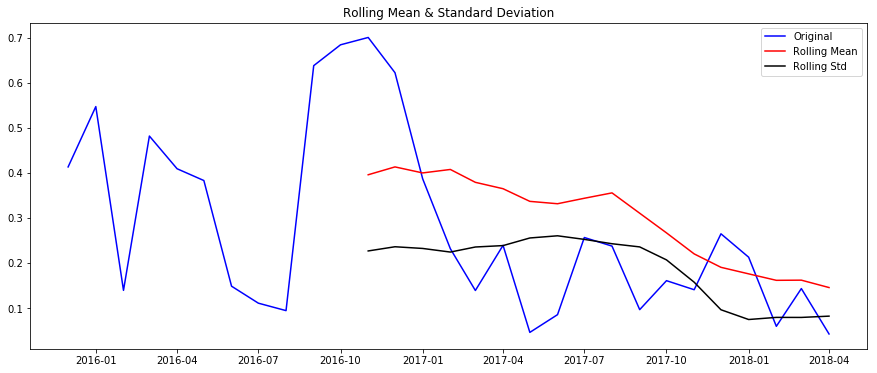

Results of Dickey-Fuller Test:
Test Statistic                 -2.453575
p-value                         0.127182
#Lags Used                      0.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64
Result: The series is not stationary


In [26]:
#testing results of moving avg method
test_stationarity(ts_log_moving_avg_diff)
dickey_f_test(ts_log_moving_avg_diff)

Date
2010-01-01          NaN
2010-02-01          NaN
2010-03-01          NaN
2010-04-01          NaN
2010-05-01          NaN
2010-06-01          NaN
2010-07-01          NaN
2010-08-01          NaN
2010-09-01          NaN
2010-10-01          NaN
2010-11-01          NaN
2010-12-01          NaN
2011-01-01          NaN
2011-02-01          NaN
2011-03-01          NaN
2011-04-01          NaN
2011-05-01          NaN
2011-06-01          NaN
2011-07-01          NaN
2011-08-01          NaN
2011-09-01          NaN
2011-10-01          NaN
2011-11-01          NaN
2011-12-01          NaN
2012-01-01          NaN
2012-02-01          NaN
2012-03-01          NaN
2012-04-01          NaN
2012-05-01          NaN
2012-06-01          NaN
                ...    
2015-11-01     9.249740
2015-12-01     9.295413
2016-01-01     9.356405
2016-02-01     9.370827
2016-03-01     9.422634
2016-04-01     9.473671
2016-05-01     9.520800
2016-06-01     9.544035
2016-07-01     9.563765
2016-08-01     9.584576
2016-09-01 

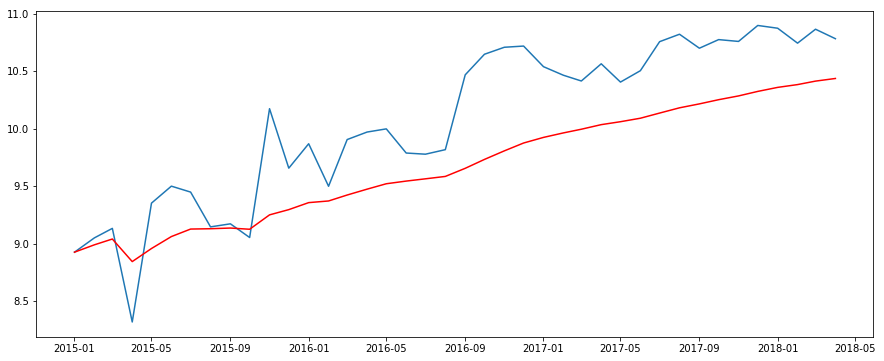

In [27]:
#exponential moving Avg Method for making series stationary
expwighted_avg = pd.Series.ewm(ts_log,halflife=12).mean()
plt.figure(figsize=(15, 6))
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
expwighted_avg

In [28]:
ts_log_ewma_diff = ts_log - expwighted_avg

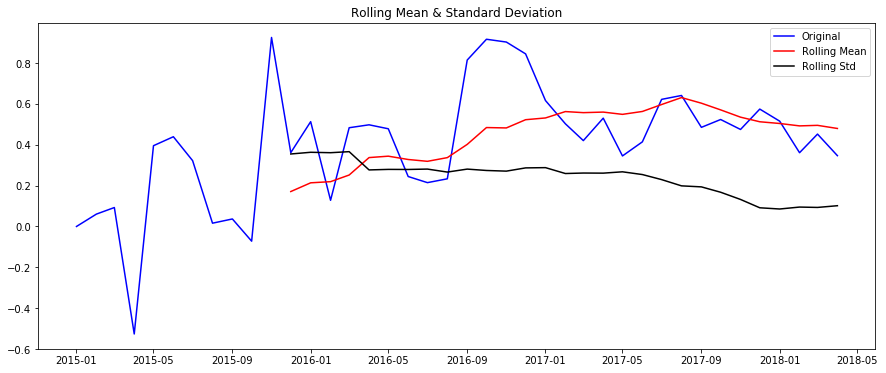

Results of Dickey-Fuller Test:
Test Statistic                 -3.527231
p-value                         0.007315
#Lags Used                      3.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64
Result: The series is stationary


In [29]:
#testing results of exponential moving avg method
ts_log_ewma_diff.dropna(inplace=True)
test_stationarity(ts_log_ewma_diff)
dickey_f_test(ts_log_ewma_diff)